
#### Loading required Libraries

In [2]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#MCAR

df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
# Missing not at random (MNAR)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### All the techniques for Handling Missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

1. Mean/ Median/Mode replacement

In [19]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [25]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [28]:
median = df.Age.median()
median

28.0

In [29]:
df['Age_median'] = df['Age'].fillna(median)

In [30]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [31]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [50]:
df['Age'].to_list()

[22.0,
 38.0,
 26.0,
 35.0,
 35.0,
 nan,
 54.0,
 2.0,
 27.0,
 14.0,
 4.0,
 58.0,
 20.0,
 39.0,
 14.0,
 55.0,
 2.0,
 nan,
 31.0,
 nan,
 35.0,
 34.0,
 15.0,
 28.0,
 8.0,
 38.0,
 nan,
 19.0,
 nan,
 nan,
 40.0,
 nan,
 nan,
 66.0,
 28.0,
 42.0,
 nan,
 21.0,
 18.0,
 14.0,
 40.0,
 27.0,
 nan,
 3.0,
 19.0,
 nan,
 nan,
 nan,
 nan,
 18.0,
 7.0,
 21.0,
 49.0,
 29.0,
 65.0,
 nan,
 21.0,
 28.5,
 5.0,
 11.0,
 22.0,
 38.0,
 45.0,
 4.0,
 nan,
 nan,
 29.0,
 19.0,
 17.0,
 26.0,
 32.0,
 16.0,
 21.0,
 26.0,
 32.0,
 25.0,
 nan,
 nan,
 0.83,
 30.0,
 22.0,
 29.0,
 nan,
 28.0,
 17.0,
 33.0,
 16.0,
 nan,
 23.0,
 24.0,
 29.0,
 20.0,
 46.0,
 26.0,
 59.0,
 nan,
 71.0,
 23.0,
 34.0,
 34.0,
 28.0,
 nan,
 21.0,
 33.0,
 37.0,
 28.0,
 21.0,
 nan,
 38.0,
 nan,
 47.0,
 14.5,
 22.0,
 20.0,
 17.0,
 21.0,
 70.5,
 29.0,
 24.0,
 2.0,
 21.0,
 nan,
 32.5,
 32.5,
 54.0,
 12.0,
 nan,
 24.0,
 nan,
 45.0,
 33.0,
 20.0,
 47.0,
 29.0,
 25.0,
 23.0,
 19.0,
 37.0,
 16.0,
 24.0,
 nan,
 22.0,
 24.0,
 19.0,
 18.0,
 19.0,
 27.0,
 9.0,
 36

In [51]:
891-177

714

In [46]:
df['Age'].median()

28.0

In [52]:
891

0

In [45]:
df['Age_median'].median()

28.0

<AxesSubplot:ylabel='Density'>

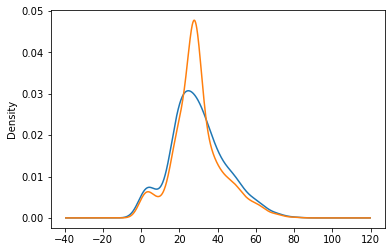

In [56]:
df['Age'].plot(kind="kde")
df['Age_median'].plot(kind='kde')

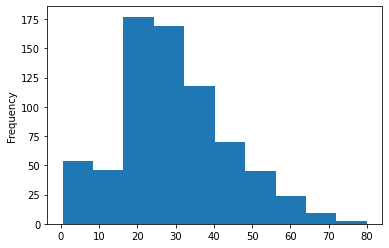

In [54]:
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind="hist")
#df['Age_median'].plot(kind='hist')
# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines,labels,loc='best')


plt.show()

<AxesSubplot:ylabel='Frequency'>

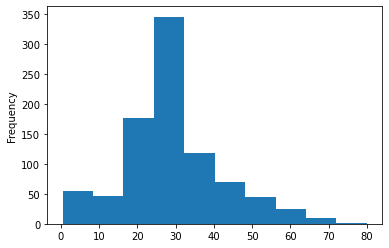

In [55]:
df['Age_median'].plot(kind='hist')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation